In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime

In [24]:
#Load the dictionaries from folder.
with open("jsons/user_to_movie.json", "rb") as f:
    user_to_movie = pickle.load(f)

with open("jsons/movie_to_user.json", "rb") as f:
    movie_to_user = pickle.load(f)

with open("jsons/user_and_movie_to_rating.json", "rb") as f:
    user_and_movie_to_rating = pickle.load(f)

#Find the number of users and movies
N = np.max(list(user_to_movie.keys())) + 1
M = np.max(list(movie_to_user.keys())) + 1


#Create an aditional dictionary
#This dictionary is responsible for finding all rating of users
user_to_movierating = {}
for i, movies in user_to_movie.items():
    r = np.array([user_and_movie_to_rating[(i,j)] for j in movies])
    user_to_movierating[i] = (movies, r)

#Create an aditional dictionary
#This dictionary is responsible for finding all rating of movies
movies_to_userrating = {}
for j, users in movie_to_user.items():
    r = np.array([user_and_movie_to_rating[(i,j)] for i in users])
    movies_to_userrating[j] = (users, r)

#Variables
K = 25   #Number of weights of users and movies

#Init weights and biases
W = np.random.randn(N,K)
b = np.zeros(N)
U = np.random.randn(M,K)
c = np.zeros(M)
#Calculate the mean
rating_mean = np.mean(list(user_and_movie_to_rating.values()))

In [25]:
#Error functions
def get_sse(m2u):
    #m2u = movie -> (user, rating)
    N = 0
    sse = 0
    for j, (user, r) in m2u.items():
        #Predict the rating using the weights of user and movie
        p = W[user].dot(U[j]) + b[user] + c[j] + rating_mean

        #Find the difference 
        delta = r - p
        #Because delta is a vector, we need dot product
        sse += delta.dot(delta)
        N += len(r)
    return sse/N

def get_mae(m2u):
    #m2u = movie -> (user, rating)
    N = 0
    mae = 0
    for j, (user, r) in m2u.items():
        #Predict the rating using the weights of user and movie
        p = W[user].dot(U[j]) + b[user] + c[j] + rating_mean
        for i in range(len(r)):
            #Find the absulute difference
            delta = abs(r[i]- p[i])
            mae += delta
        N += len(r)
    return mae/N

def predict(userID, movieID):
    p = W[userID].dot(U[movieID]) + b[userID] + c[movieID] + rating_mean
    return p

In [26]:



#Parametres for training
epochs = 50
reg = 0.1
mae_losses = []
sse_losses = []



In [27]:
for epoch in range(epochs):
    print("Epoch", epoch)
    #Time calculation
    epoch_start = datetime.now()
    t0 = datetime.now()

    for i in range(N):
        m_ids, r = user_to_movierating[i]
        #Implement formulas
        matrix = U[m_ids].T.dot(U[m_ids]) + np.eye(K) * reg
        vector = (r - b[i] - c[m_ids] - rating_mean).dot(U[m_ids])
        bi = (r - U[m_ids].dot(W[i]) - c[m_ids] - rating_mean).sum()
        
        #Find new weight and bias
        W[i] = np.linalg.solve(matrix, vector)
        b[i] = bi/ (len(user_to_movie[i]) + reg)

        if i % 300 == 0:
            print("i: ", i, "N: ", N)
    print("Updated W and b: ", datetime.now() - t0)

    t1 = datetime.now()
    for j in range(M):
        try:
            #Implement formulas
            u_ids, r = movies_to_userrating[j]
            matrix = W[u_ids].T.dot(W[u_ids]) + np.eye(K)*reg
            vector = (r - b[u_ids] - c[j] - rating_mean).dot(W[u_ids])
            cj = (r - W[u_ids].dot(U[j]) - b[u_ids] - rating_mean).sum()

            #Find new weight and bias
            U[j] = np.linalg.solve(matrix, vector)
            c[j] = cj / (len(movie_to_user[j]) + reg)
        except:
            pass
        if j % 4000 == 0:
            print("j: ", j, "M: ", M)
    
        
    print("Updated U and c: ", datetime.now() - t1)
    print("Epoch ends: ", datetime.now()- epoch_start)

    t2 = datetime.now()
    sse_losses.append(get_sse(movies_to_userrating))
    mae_losses.append(get_mae(movies_to_userrating))

    print("Calculating errors", datetime.now() - t2)
    print("SSE: ", sse_losses[-1])
    print("MAE: ", mae_losses[-1])

print("SSE: ", sse_losses[-1])
print("MAE: ", mae_losses[-1])

Epoch 0
i:  0 N:  610
i:  300 N:  610
i:  600 N:  610
Updated W and b:  0:00:00.447413
j:  0 M:  9724
j:  4000 M:  9724
j:  8000 M:  9724
Updated U and c:  0:00:04.487280
Epoch ends:  0:00:04.934693
Calculating errors 0:00:00.141540
SSE:  0.45291203122786283
MAE:  0.5147322842891718
Epoch 1
i:  0 N:  610
i:  300 N:  610
i:  600 N:  610
Updated W and b:  0:00:00.376089
j:  0 M:  9724
j:  4000 M:  9724
j:  8000 M:  9724
Updated U and c:  0:00:04.483853
Epoch ends:  0:00:04.859942
Calculating errors 0:00:00.151385
SSE:  0.23418799840882717
MAE:  0.3648024430099865
Epoch 2
i:  0 N:  610
i:  300 N:  610
i:  600 N:  610
Updated W and b:  0:00:00.379933
j:  0 M:  9724
j:  4000 M:  9724
j:  8000 M:  9724
Updated U and c:  0:00:04.382292
Epoch ends:  0:00:04.763226
Calculating errors 0:00:00.146728
SSE:  0.16192767739159342
MAE:  0.29520871358391865
Epoch 3
i:  0 N:  610
i:  300 N:  610
i:  600 N:  610
Updated W and b:  0:00:00.361903
j:  0 M:  9724
j:  4000 M:  9724
j:  8000 M:  9724
Updated U

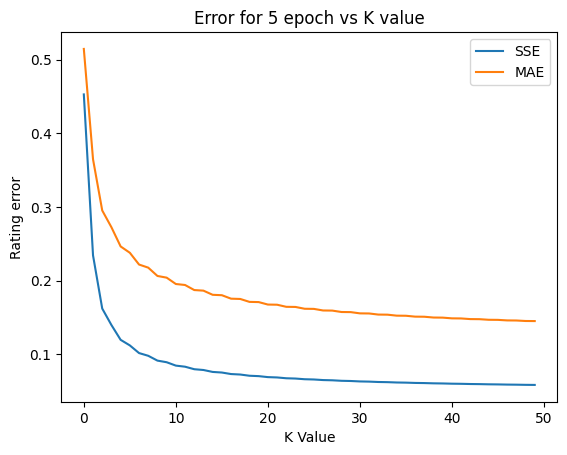

In [29]:
plt.plot(sse_losses, label="SSE")
plt.plot(mae_losses, label="MAE")
plt.xlabel("Epoch")
plt.ylabel("Rating error out of 5")
plt.title("Error for 5 epoch vs K value")
plt.legend()
plt.show()

In [30]:
print(predict(0,0))

4.723996102976278


<h1>Solution for Coldstart problem</h1>

In [ ]:
user_with_low_movie  = [[100, 4], [50, 2], [25, 4.5]] #A user who has rated a low number of movies
number_of_recommendation = 10

<h1>Hybrid</h1>

In [50]:
error_rate = 0.0001 #We used error because, if difference between rating and average rating is 0, we will lose a rating 
liked = []  #A list for liked movies
disliked = [] #A list for disliked movies
liked_with_degree = [] #Instead of direct rating, use difference between total average rating
disliked_with_degree = []
for rating in user_with_low_movie:
    if rating[1] >= rating_mean:
        liked.append(rating)
        liked_with_degree.append([rating[0], rating[1]-rating_mean+error_rate])
    else:
        disliked.append(rating)
        disliked_with_degree.append([rating[0], rating_mean - rating[1]])

In [95]:
#making differences percantage
total_liked = 0
for degree in liked_with_degree:
    total_liked += degree[1]

for degree in liked_with_degree:
    degree[1] = degree[1] / total_liked

total_disiked = 0
for degree in disliked_with_degree:
    total_disiked += degree[1]

for degree in disliked_with_degree:
    degree[1] = degree[1] / total_disiked

In [102]:
#Using liked 
user_fav_movie_weights = np.zeros(K)
for rating in liked_with_degree:
    user_fav_movie_weights += U[rating[0]] * rating[1] # Movie K values * how much the User values the movie
    

#Find the similarities between users Final Movie taste which is user_fav_movie_weights
similarities =[]
for weight in U:
    similarity = np.dot(user_fav_movie_weights, weight)
    similarities.append(similarity)

#Find the indeces of the top number of recemmendations. We wanted 10, so will get 10 indeces
indices = np.argsort(similarities)[-number_of_recommendation:][::-1]




In [97]:
df = pd.read_csv("data/edited_rating.csv")

#Using movie indeces, find movie ids
movieIds = []
for index in indices:
    xd = df[df["movie_index"] == index]
    id = xd["movieId"].values[0]
    movieIds.append(id)


new_df = pd.read_csv("data/movies.csv")

#Using movie ids, find movie names and print
movie_names = []
for id in movieIds:
    xd = new_df[new_df["movieId"] == id]
    name = xd["title"].values[0]
    print(name)


Indiana Jones and the Kingdom of the Crystal Skull (2008)
Hunchback of Notre Dame, The (1996)
What About Bob? (1991)
Jay and Silent Bob Strike Back (2001)
Punch-Drunk Love (2002)
K-PAX (2001)
Aviator, The (2004)
Pinocchio (1940)
Hudsucker Proxy, The (1994)
Emperor's New Groove, The (2000)


In [117]:
#Using disliked
#Same method with the above.
#Only difference is we take the indeces of the bottom instead of the top
user_least_movie_weights = np.zeros(K)
for rating in disliked_with_degree:
    user_least_movie_weights += U[rating[0]] * rating[1]


similarities2 =[]
for weight in U:
    similarity2 = np.dot(user_least_movie_weights, weight)
    similarities2.append(similarity2)

indices2 = np.argsort(similarities2)[:number_of_recommendation]


In [118]:
dislikedMovieIds = []

for index in indices2:
    xd = df[df["movie_index"] == index]
    id = xd["movieId"].values[0]
    dislikedMovieIds.append(id)

for id in dislikedMovieIds:
    xd = new_df[new_df["movieId"] == id]
    name = xd["title"].values[0]
    print(name)

Love Actually (2003)
Chicago (2002)
Bridget Jones's Diary (2001)
Hudsucker Proxy, The (1994)
10 Things I Hate About You (1999)
Now You See Me (2013)
The Imitation Game (2014)
AVP: Alien vs. Predator (2004)
(500) Days of Summer (2009)
Popeye (1980)


<h1>Critic</h1>

In [ ]:
partition_count = 7 #Number of separate groups we will divide the users into
partition_weights = [] #List to store the average weights of each partition
partition_biases = [] #List to store the average biases of each partition
width = int(len(user_to_movie)/partition_count) #Width of the each partition

for i in range(partition_count):
    current_partition_weights = np.zeros(K) #Initializing the weights of the current partition in the loop
    current_partition_bias = 0 #Initializing the bias of the current partition
    
    for j in range(width):
        current_partition_weights += W[i * width + j]
        current_partition_bias += b[i * width + j]
    
    #Normalizing the weights and bias
    current_partition_weights /= width  
    current_partition_bias /= width
    
    partition_weights.append(current_partition_weights)
    partition_biases.append(current_partition_bias)

In [ ]:
def partition_predict(partition_num, movieID):
    p = partition_weights[partition_num].dot(U[movieID]) + partition_biases[partition_num] + c[movieID] + rating_mean #Calculating the predicted ratings by a given partition
    return p

In [ ]:
def predict_ratings_by_partitions(user_with_low_movie): #Stores the predictions made by each partition's weights and bias in a dictionary
    rating_predictions = {}

    for (movie, rating) in user_with_low_movie:
        predictions_for_movie = []
        for i in range(len(partition_weights)):
            predicted_rating = partition_predict(i, movie) #Prediction made by the current partition's weights
            predictions_for_movie.append(predicted_rating)
        
        rating_predictions[movie] = {"Rating": rating, "Predictions": predictions_for_movie}
    
    return rating_predictions

In [ ]:
rating_predictions = predict_ratings_by_partitions(user_with_low_movie)

for movie_id, rating_info in rating_predictions.items():
    actual_rating = rating_info["Rating"]
    predictions = rating_info["Predictions"]

    print(f"Movie ID: {movie_id}\nActual Rating: {actual_rating}\nPredicted Ratings: {predictions}\n")

Movie ID: 100
Actual Rating: 4
Predicted Ratings: [3.2871726744215946, 3.293524802884494, 3.1805572600383605, 3.291232458459858, 3.3220773919532247]

Movie ID: 50
Actual Rating: 2
Predicted Ratings: [3.3575259175682173, 3.3380968106121394, 3.2383369509092543, 3.336553437740728, 3.3659041825508798]

Movie ID: 25
Actual Rating: 4.5
Predicted Ratings: [3.6054925126055792, 3.7531155612961324, 3.415260357454393, 3.6589334705543037, 3.5714059816879478]



In [ ]:

def find_influence_weights(rating_predictions): #Finds the influence of each partition based on how close they predict actually rated movies' ratings
    actual_ratings = np.array([rating_info["Rating"] for rating_info in rating_predictions.values()]) #Ratings of the user with low number of rated movies
    predicted_ratings = np.array([rating_info["Predictions"] for rating_info in rating_predictions.values()]) #Predicted ratings

    differences = np.abs(predicted_ratings - actual_ratings.reshape(-1, 1)) #Calculating absolute differences

    #Determining influence weights based on minimum differences for each group
    influence_weights = 1 / np.mean(differences, axis=0)
    influence_weights /= np.sum(influence_weights)  # Normalize weights to sum to 1

    return influence_weights

In [2]:
influence_weights = find_influence_weights(rating_predictions)

NameError: name 'find_influence_weights' is not defined

In [ ]:
def predict_all_ratings(influence_weights): #Predicts the ratings a user is going to give to all of the movies
    all_predictions = []
    for movie_id in range(M):
        prediction = 0
        for i in range(partition_count):
            prediction += influence_weights[i] * partition_predict(i, movie_id) #Multiplying each partition's predicted rating with the partition influence
        all_predictions.append(prediction)
    
    return all_predictions

In [ ]:
all_predictions = predict_all_ratings(influence_weights) #Predicted ratings for all the movies of the user with a low number of rated movies

indices = np.argsort(all_predictions)[-number_of_recommendation:][::-1]

In [ ]:
df = pd.read_csv("data/edited_rating.csv")

movieIds = []
for index in indices:
    xd = df[df["movie_index"] == index]
    id = xd["movieId"].values[0]
    movieIds.append(id)


new_df = pd.read_csv("data/movies.csv")

movie_names = []
for id in movieIds:
    xd = new_df[new_df["movieId"] == id]
    name = xd["title"].values[0]
    print(name)

Thank You for Smoking (2006)
Band of Brothers (2001)
Grand Day Out with Wallace and Gromit, A (1989)
In the Name of the Father (1993)
Ben-Hur (1959)
Big Short, The (2015)
Celebration, The (Festen) (1998)
Howl's Moving Castle (Hauru no ugoku shiro) (2004)
Shawshank Redemption, The (1994)
Never Cry Wolf (1983)


In [ ]:
user_movies_ratings = user_to_movierating[1] #Movie id's user 1 has rated and their corresponding ratings
user_low_movie_ratings = list(zip(user_movies_ratings[0][:2], user_movies_ratings[1][:2])) #Getting the first two movie ids and ratings to evaluate our recommendation system

user_with_low_movie = [[movie_id, rating] for movie_id, rating in user_low_movie_ratings] #Creatinga list of lists [[movie_id, rating]]

In [ ]:
partition_rating_predictions = predict_ratings_by_partitions(user_with_low_movie) #Predictions of each one of the k groups
influence_weights = find_influence_weights(partition_rating_predictions) #Influence weights of the groups
all_predictions = predict_all_ratings(influence_weights) #Predicting ratings that user 1 is going to give to all the movies

In [ ]:
user_actual_ratings = user_movies_ratings[1] #Ratings of user 1

predicted_ratings_for_user1 = [all_predictions[movie_id] for movie_id in user_movies_ratings[0]] #Getting only the movies that were rated by user 1 in order to evaluate the recommendation system

mean_difference = np.mean(np.abs(user_actual_ratings - np.array(predicted_ratings_for_user1))) #Getting the mean difference

print("Mean Difference:", mean_difference)

Mean Difference: 0.6748494270436873
